In [30]:
import pandas as pd
import matplotlib
import numpy as np

In [3]:
df=pd.read_csv("Dataset\\train_ctrUa4K.csv")

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df['ApplicantIncome'].hist(bins=50) #https://medium.com/python-pandemonium/data-visualization-in-python-histogram-in-matplotlib-dce38f49f89c

In [8]:
import matplotlib as plt

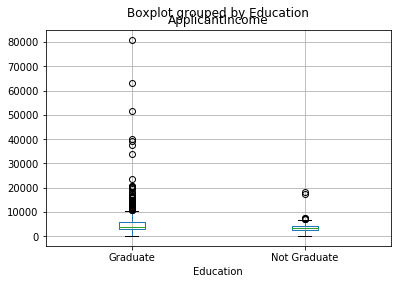

In [9]:
df.boxplot(column='ApplicantIncome' ,by='Education')

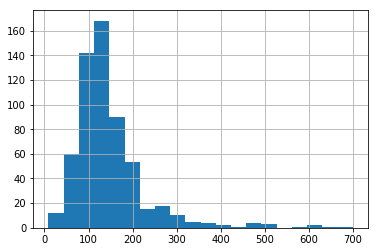

In [10]:
df['LoanAmount'].hist(bins=20)

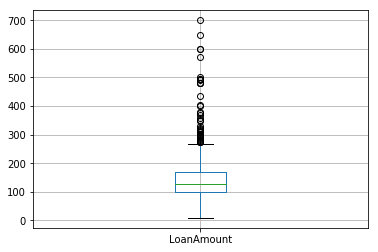

In [11]:
df.boxplot(column='LoanAmount')

In [12]:
temp1=df["Credit_History"].value_counts()
print(temp1)

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [13]:
temp2=df.pivot_table(values="Loan_Status",index=["Credit_History"],aggfunc=lambda a:a.map({'Y':1,'N':0}).mean())
print(temp2)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


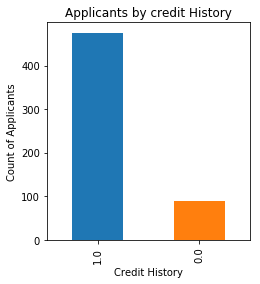

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.set_xlabel("Credit History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by credit History")
temp1.plot(kind='bar')

In [15]:
df.loc[(df["Self_Employed"]=="Yes")&(df["Education"]=="Not Graduate")&(df["Loan_Status"]=="Y"),["Self_Employed","Education","Loan_Status"]]

,Self_Employed,Education,Loan_Status
44,Yes,Not Graduate,Y
68,Yes,Not Graduate,Y
71,Yes,Not Graduate,Y
79,Yes,Not Graduate,Y
213,Yes,Not Graduate,Y
252,Yes,Not Graduate,Y
439,Yes,Not Graduate,Y
493,Yes,Not Graduate,Y
534,Yes,Not Graduate,Y
563,Yes,Not Graduate,Y


In [16]:
def num_missing(x):
    return sum(x.isnull())
print(df.apply(num_missing,axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [18]:
def num_missing(x):
    return sum(x.isnull())
print(df.apply(num_missing,axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


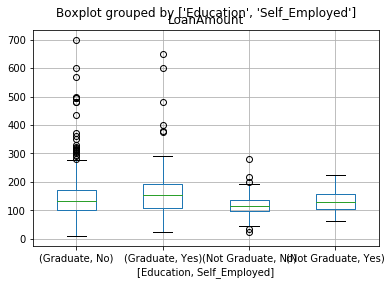

In [19]:
df.boxplot(column="LoanAmount",by=['Education',"Self_Employed"])

In [20]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df["Self_Employed"].fillna("No",inplace=True)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [25]:
df["Married"].fillna("Yes",inplace=True)

In [26]:
pd.crosstab(df["Credit_History"],df["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [31]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

In [34]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [35]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])

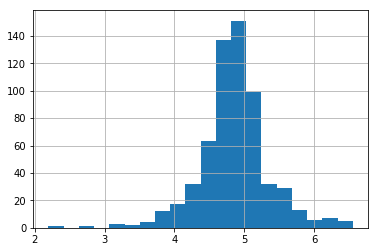

In [36]:
df['LoanAmount_log'].hist(bins=20) 